Cando acabes explica un pouco como funcionan estas redes neuronales
Using Convultional Neural Networks.
https://www.youtube.com/watch?v=YRhxdVk_sIs
https://towardsdatascience.com/conv-nets-for-dummies-a-bottom-up-approach-c1b754fb14d6

## Guitar?
I would have prefer to do a project about "bagpipe or not bagpipe" rather than "guitar or not guitar". However, bagpipes are not such a popular instruments as guitars are. Therefore, I had to choose guitars because of high number of images which are containend on ImageNet, the web used to get the images.

The purpose of this project is to go into what deep learning is and create a Convultional Neural Networks in order to create a model and recognize if the istrument is present (or not) in a picture.

The project is divided in 4 main blocks:

1_Getting the necessary data to go ahaed with the model: This part is ignored in most of the tutorials, but it is one of the most difficult parts of any project. Usually, data scientiest which have just started work in this filed, have never faced the problems of getting the data. In real word the data is not clean and there is a lot of work to do before starting to build the model

2_Preparing the data

3_Creating the model:

4_Testing the performance of the model: Cofussion matrix, recal, accuracy, ROC cuurve...

NOTE: Due the the high computational resources that this Convultional Neural Network requires, I recommend run the code using google coolab.

Contact information:
Name: Francisco Álvarez González
E-mail: paquinho89@hotmail.com

Note: After having done a master in Data Science, I am doing some projects to have a bigger portfolio and get some employment opportunities.

In [2]:
#The necessary libraries and packages is imported.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense
from keras import optimizers
from keras import losses
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

Using TensorFlow backend.


## 1 Getting the images.
To get the images I used one of the biggest repositories of tagged images as it is ImageNet. For more information about this website visit:
http://www.image-net.org/

First, I copied in a file (url_guitars) all the links where the images are contained, and then I went over each link getting the images.


In [0]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import requests
import os
from PIL import Image

In [3]:
!pwd

/content


In [4]:
#This is to let google colab to get access to my google Drive account.

from google.colab import drive
drive.mount('/content/gdrive')

#If I go to the left of the screen, I see that the photos are in the following folder:
#"content/gdrive/MyDrive/bagpipe/photos..."

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Intenta non executar este código
## Getting pictures of bass_guitar.

In [0]:
#This url contains all the urls with the images 
url_bass_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02804123'

r = requests.get(url_bass_guitar)
#This is to get the file with the urls which contains the pictures. And another file is created and it is 
#called photos_urls
with open('./gdrive/My Drive/guitar_project/photos_url_bass_guitar', 'wb') as f:  
    f.write(r.content)
f.close()

In [0]:
#This open the file which contains all the urls of the images
photos_urls_bass_guitar=open('./gdrive/My Drive/guitar_project/photos_url_bass_guitar', mode='r')
n=1
for url in photos_urls_bass_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/guitar_photos/img_guitar_b_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
      pass

## Getting pictures of acoustic_guitar

In [0]:
url_acoustic_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02676566'

r = requests.get(url_acoustic_guitar)
#This is to get the file with the urls which contains the pictures. And another file is created and it is 
#called photos_urls
with open('./gdrive/My Drive/guitar_project/url_acoustic_guitar', 'wb') as f:  
    f.write(r.content)
f.close()

In [0]:
#This open the file which contains all the urls of the images
photos_urls_acoustic_guitar=open('./gdrive/My Drive/guitar_project/url_acoustic_guitar', mode='r')
n=1
for url in photos_urls_acoustic_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/guitar_photos/img_guitar_ac_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
      pass

## Getting pictures of electric_guitar

In [0]:
url_electric_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03272010'

r = requests.get(url_electric_guitar)
#This is to get the file with the urls which contains the pictures. And another file is created and it is 
#called photos_urls
with open('./gdrive/My Drive/guitar_project/url_electric_guitar', 'wb') as f:  
    f.write(r.content)
f.close()

In [0]:
#This open the file which contains all the urls of the images
photos_urls_electric_guitar=open('./gdrive/My Drive/guitar_project/url_electric_guitar', mode='r')
n=1
for url in photos_urls_electric_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/guitar_photos/img_guitar_e_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
      pass

## Getting pictures of hawaiian_guitar

In [0]:
url_hawaiian_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03499907'

r = requests.get(url_hawaiian_guitar)
#This is to get the file with the urls which contains the pictures. And another file is created and it is 
#called photos_urls
with open('./gdrive/My Drive/guitar_project/url_hawaiian_guitar', 'wb') as f:  
    f.write(r.content)
f.close()

In [0]:
#This open the file which contains all the urls of the images
photos_urls_hawaiian_guitar=open('./gdrive/My Drive/guitar_project/url_hawaiian_guitar', mode='r')
n=1
for url in photos_urls_hawaiian_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/guitar_photos/img_guitar_hw_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
      pass

## Getting pictures of ukelele_guitar

In [0]:
url_ukelele_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04506289'

r = requests.get(url_ukelele_guitar)
#This is to get the file with the urls which contains the pictures. And another file is created and it is 
#called photos_urls
with open('./gdrive/My Drive/guitar_project/url_ukelele_guitar', 'wb') as f:  
    f.write(r.content)
f.close()

In [0]:
#This open the file which contains all the urls of the images
photos_urls_ukelele_guitar=open('./gdrive/My Drive/guitar_project/url_ukelele_guitar', mode='r')
n=1
for url in photos_urls_ukelele_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/guitar_photos/img_guitar_uk_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
      pass

#Este é o código que debes de executar.
#Este é o código que deberías de utilizar. É un código escrit dunha maneria máis intelixente.
##O tema e que esta maneira de proceder pois descargache bastantes menos fotos.

In [0]:
url_hawaiian_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03499907'
url_bass_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02804123'
url_acoustic_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02676566'
url_electric_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03272010'
url_classical_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03035832'

url_guitar = [url_bass_guitar, url_electric_guitar, url_hawaiian_guitar, url_acoustic_guitar, url_ukelele_guitar]

for url in url_guitar:
  r = requests.get(url)
  #This is to get the file with the urls which contains the pictures. And another file is created and it is 
  #called photos_urls
  with open('./gdrive/My Drive/guitar_project/url_guitars', 'ab') as f:  
      f.write(r.content)
  f.close()

In [0]:
#This open the file which contains all the urls of the images
photos_urls_guitar=open('./gdrive/My Drive/guitar_project/url_guitars', mode='r')
n=1
for url in photos_urls_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/img_guitar_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
      pass

In [3]:
#This code is just to see how to name the files
o=1

print('pepe morteo {:06d}'.format(o))

pepe morteo 000001


###Secondly, I created a list with the names of the pictures and I tried to open the images. If it is not possible to open them, the file is deleted as the link is broken or the image is not contained in the link anymore.

In [0]:
#A list is created with the names of the pictures
list_names=os.listdir('./gdrive/My Drive/guitar_project/training_photos/guitar_photos')
#We go over the list and if the file is not possible to be opened, it is removed as there is an error in the file.
#In this way, we just have the files which have photos and they are correct
for name in list_names:
    try:
        Image.open('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name)
    except:
        os.remove('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name)

In [9]:
#Number of pictures
list_names=os.listdir('./gdrive/My Drive/guitar_project/guitar_photos')
len(list_names)

2452

In [0]:
#The pictures are going to be distribued into 2 folders. One pictures will be for training (85%) ant the rest (15%)
#for validation. Two new folders will be created in the photos folder: 'training_photos' and 'validation_photos'.

training_photos_percentage=round(len(list_names)*0.85)
n=1

for name in list_names:
    if n<training_photos_percentage:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name, './gdrive/My Drive/guitar_project/training_photos/guitar_photos/img_{:06d}.jpg'.format(n))
        n=n+1
    
    else:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name,'./gdrive/My Drive/guitar_project/validation_photos/guitar_photos/img_{:06d}.jpg'.format(n))
        n=n+1 

## Pictures with NO guitars
Now we need to repeat the process with images that are no guitars. I am going to get 20 images of each followed class: fish, car, bike, motorbike, cat, city, guitar, office, lamp and book.
The process to follow is the same as the one used for getting the guitar pictures. Firstly, I will get the urls of the images through ImageNet and then I will go over the links dowloading the images.

In [0]:
#Each link contains urls of fish, cars, cat and cities. 
url_fish = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02512938'
url_car = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02960352'
url_cat = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02127808'
url_city = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03036244'
url_office = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03841666'

url_no_guitar=[url_fish, url_car, url_cat, url_city, url_office]

for url in url_no_guitar:
  r = requests.get(url)
  with open('./gdrive/My Drive/guitar_project/url_no_guitar_delete', 'wb') as f:
    f.write(r.content)
  f.close()
  photos_url_no_guitar=open('./gdrive/My Drive/guitar_project/url_no_guitar_delete', mode='rb')

  n=1
  with open('./gdrive/My Drive/guitar_project/url_no_guitar', 'ab') as f:
      for url in photos_url_no_guitar:
          if n<500:
              f.write(url)
              n=n+1
          else:
              break
  os.remove('./gdrive/My Drive/guitar_project/url_no_guitar_delete')


In [0]:
#This open the file which contains all the urls of the images with no_guitars
photos_urls_no_guitar=open('./gdrive/My Drive/guitar_project/url_no_guitar', mode='r')
n=1
for url in photos_urls_no_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/img_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
        pass

In [0]:
#A list is created with the names of the pictures
list_names=os.listdir('./gdrive/My Drive/guitar_project/no_guitar_photos')
#We go over the list and if the file is not possible to be opened, it is removed as there is an error in the file.
#In this way, we just have the files which have photos and they are correct
for name in list_names:
    try:
        Image.open('./gdrive/My Drive/guitar_project/no_guitar_photos/'+ name)
    except:
        os.remove('./gdrive/My Drive/guitar_project/no_guitar_photos/'+ name)
        

In [0]:
#The pictures are going to be distribued into 2 folders. One pictures will be for training (85%) ant the rest (15%)
#for validation. Two new folders will be created in the photos folder: 'training_photos' and 'validation_photos'.
list_names=os.listdir('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos')
training_photos_percentage=round(len(list_names)*0.85)
n=1

for name in list_names:
    if n<training_photos_percentage:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/'+name,'./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/no_guitar_img_{:06d}.jpg'.format(n))
        n=n+1
    
    else:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/'+name,'./gdrive/My Drive/guitar_project/validation_photos/no_guitar_photos/no_guitar_img_{:06d}.jpg'.format(n))
        n=n+1 

#Esta é a maneria burra de facelo.  Se che sale da outra forma non utilices este código

In [0]:
#60 pictures of fish
#This url contains all the urls with the fishimages 
url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02512938'  
r = requests.get(url)
#This is to get the file with the urls which contains the pictures. And another file is created and it is 
#called photos_urls
with open('./photos_urls_fish_delete', 'wb') as f:
    f.write(r.content)
    
#Another file is going to be created ('photos_urls_fish) with just 29 urls for fish pictures.
#Moreover, the file 'photos_urls_fish_delete' is gooing to be deleted as it is not anymore useful.

photos_urls_fish=open('./photos_urls_fish_delete', mode='rb')

n=1
with open('./photos_urls_fish', 'wb') as f:
    for url in photos_urls_fish:
        if n<60:
            f.write(url)
            n=n+1
        else:
            break
os.remove('./photos_urls_fish_delete')
#The same operation is going to be perfrmed for the rest of the pictures
###################################################################
#60 pictures of cars
url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02960352'  
r = requests.get(url)
with open('./photos_urls_cars_delete', 'wb') as f:
    f.write(r.content)
photos_urls_fish=open('./photos_urls_cars_delete', mode='rb')
n=1
with open('./photos_urls_cars', 'wb') as f:
    for url in photos_urls_fish:
        if n<60:
            f.write(url)
            n=n+1
        else:
            break
os.remove('./photos_urls_cars_delete')
#####################################################################
#60 pictures of cat
url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02127808'  
r = requests.get(url)
with open('./photos_urls_cat_delete', 'wb') as f:
    f.write(r.content)
photos_urls_cat=open('./photos_urls_cat_delete', mode='rb')
n=1
with open('./photos_urls_cat', 'wb') as f:
    for url in photos_urls_cat:
        if n<60:
            f.write(url)
            n=n+1
        else:
            break
os.remove('./photos_urls_cat_delete')
###################################
#60 pictures of city
url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03036244'  
r = requests.get(url)
with open('./photos_urls_city_delete', 'wb') as f:
    f.write(r.content)
photos_urls_city=open('./photos_urls_city_delete', mode='rb')
n=1
with open('./photos_urls_city', 'wb') as f:
    for url in photos_urls_city:
        if n<60:
            f.write(url)
            n=n+1
        else:
            break
os.remove('./photos_urls_city_delete')
##########################################
#60 pictures of guitar
url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03467517'  
r = requests.get(url)
with open('./photos_urls_guitar_delete', 'wb') as f:
    f.write(r.content)
photos_urls_guitar=open('./photos_urls_guitar_delete', mode='rb')
n=1
with open('./photos_urls_guitar', 'wb') as f:
    for url in photos_urls_guitar:
        if n<60:
            f.write(url)
            n=n+1
        else:
            break
os.remove('./photos_urls_guitar_delete')
#####################################################
url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03841666'  
r = requests.get(url)
with open('./photos_urls_office_delete', 'wb') as f:
    f.write(r.content)
photos_urls_office=open('./photos_urls_office_delete', mode='rb')
n=1
with open('./photos_urls_office', 'wb') as f:
    for url in photos_urls_office:
        if n<60:
            f.write(url)
            n=n+1
        else:
            break
os.remove('./photos_urls_office_delete')

In [0]:
#This open the file which contains all the urls of the images with fishes
photos_urls_fish=open('./photos_urls_fish', mode='r')
n=1
for url in photos_urls_fish:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./photos/training_photos/not_bagpipes/fish_img_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
        pass
#The same operation is repeated for:
####################################################
#for cars
photos_urls_cars=open('./photos_urls_cars', mode='r')
n=1
for url in photos_urls_cars:
    try:
        r=requests.get(url)
        with open('./photos/training_photos/not_bagpipes/cars_img_{:06d}.jpg'.format(n), 'wb') as f:
            f.write(r.content)
        n=n+1
    except:
        pass
###################################################
#for cat
photos_urls_cat=open('./photos_urls_cat', mode='r')
n=1
for url in photos_urls_cat:
    try:
        r=requests.get(url)
        with open('./photos/training_photos/not_bagpipes/cat_img_{:06d}.jpg'.format(n), 'wb') as f:
            f.write(r.content)
        n=n+1
    except:
        pass
###########################################
#for city
photos_urls_city=open('./photos_urls_city', mode='r')
n=1
for url in photos_urls_city:
    try:
        r=requests.get(url)
        with open('./photos/training_photos/not_bagpipes/city_img_{:06d}.jpg'.format(n), 'wb') as f:
            f.write(r.content)
        n=n+1
    except:
        pass
#####################
#for guitar
photos_urls_guitar=open('./photos_urls_guitar', mode='r')
n=1
for url in photos_urls_guitar:
    try:
        r=requests.get(url)
        with open('./photos/training_photos/not_bagpipes/guitar_img_{:06d}.jpg'.format(n), 'wb') as f:
            f.write(r.content)
        n=n+1
    except:
        pass
########################
#for office
photos_urls_office=open('./photos_urls_office', mode='r')
n=1
for url in photos_urls_office:
    try:
        r=requests.get(url)
        with open('./photos/training_photos/not_bagpipes/office_img_{:06d}.jpg'.format(n), 'wb') as f:
            f.write(r.content)
        n=n+1
    except:
        pass

In [0]:
#A list is created with the names of the pictures
list_names=os.listdir('./photos/training_photos/not_bagpipes')
#We go over the list and if the file is not possible to be opened, it is removed as there is an error in the file.
#In this way, we just have the files which have photos and they are correct
for name in list_names:
    try:
        Image.open('./photos/training_photos/not_bagpipes/'+name)
    except:
        os.remove('./photos/training_photos/not_bagpipes/'+name)

In [0]:
list_names

In [0]:
#The pictures are going to be distribued into 2 folders. One pictures will be for training (85%) ant the rest (15%)
#for validation. Two new folders will be created in the photos folder: 'training_photos' and 'validation_photos'.
list_names=os.listdir('./photos/training_photos/not_bagpipes')
training_photos_percentage=round(len(list_names)*0.85)
n=1

for name in list_names:
    if n<training_photos_percentage:
        os.rename('./photos/training_photos/not_bagpipes/'+name,'./photos/training_photos/not_bagpipes/no_bagpipe_img_{:06d}.jpg'.format(n))
        n=n+1
    
    else:
        os.rename('./photos/training_photos/not_bagpipes/'+name,'./photos/validation_photos/not_bagpipes/no_bagpipe_img_{:06d}.jpg'.format(n))
        n=n+1 

## 2 Preparing the data

In [0]:
#Declaring the variables.
base_dir = './gdrive/My Drive/guitar_project/'
train_dir = os.path.join(base_dir, 'training_photos')
validation_dir = os.path.join(base_dir, 'validation_photos')
img_rows = 150
img_cols = 150
epochs = 20
batch_size = 64
num_of_train_samples = 500
num_of_test_samples = 310

### Image Augmentation Techniques:
Image Augmentations techniques are methods of artificially increasing the variations of images in our data-set by using horizontal/vertical flips, rotations, variations in brightness of images, horizontal/vertical shifts etc.
Therefore, due the low number of pictures recolected, these techniques are going to be used in the project.

To know more about Image Augmentation, take a look to the below link:
https://medium.com/@arindambaidya168/https-medium-com-arindambaidya168-using-keras-imagedatagenerator-b94a87cdefad


In [55]:
#Rotating and rescaling the images in the photos for training and he photos for testing.
train_datagen = ImageDataGenerator(rescale=1 / 255, rotation_range=20)
test_datagen = ImageDataGenerator(rescale=1 / 255, rotation_range=20)

#The ImageDataGenerator class has three methods flow(), flow_from_directory() and 
#flow_from_dataframe() to read the images from a big numpy array and folders containing images.
#The target_size is the size of your input images, every image will be resized to this size.
#For more information see the below link:
#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    color_mode="rgb",
                                                    class_mode='binary',
                                                    shuffle=True,
                                                    seed=42)

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                  target_size=(img_rows, img_cols),
                                                  batch_size=batch_size,
                                                  color_mode="rgb",
                                                  class_mode='binary',
                                                  shuffle=True,
                                                  seed=42)



Found 3500 images belonging to 2 classes.
Found 602 images belonging to 2 classes.


## 3 Creating the model

### KERAS. 
In order to create the model, one of the most important libraries to create high-level neural networks is going to be used.
For more information related to this library see the below link:
https://keras.io/

The following steps are going to be followed to create the model:n/
1_Decide on the architecture of the network (number of layers, type of each layer, size of each layer)
2_Decide on the activation functions on each layer
3_Decide on the parameters related to the optimization process (e.g. learning rate)
4_Decide on the loss function that we will use
5_Decide on the metrics that we will use to evaluate the performance of the model
6_Decide on the training parameters and train the model (number of epochs, batch size...)


In [56]:
#The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, 
#a linear stack of layers.
#The simplest model is created.
guitar_model= keras.Sequential()

##1_Decide on the architecture of the network (number of layers, type of each layer, size of each layer)
##2_Decide on the activation functions on each layer
#Stacking layers is as easy as .add(). Therefore, the layers are going to be added.

#The first is the input layer. This layer is 'Conv2D' type layer, with 32 nodes in the input layer.
#The first layer needs an input shape. The input shape specifies the number of rows and columns in the input. 
#If there is nothing after the comma which indicates the rows, there can be any amount of rows. The 3 indicated the of chanel colors in the images(Red,Green,Blue)
#‘Activation’ is the activation function for the layer. An activation function allows models to take
#into account nonlinear relationships. For example, if you are predicting diabetes in patients, 
#going from age 10 to 11 is different than going from age 60–61. There are different types for the acivation function.
#"Relu" is the most famous one.
#32 is the number of filters
#(3,3) is the size f the filter (in some tutorials you will see kernel, but it is the same)
#Stride specifies how much we move the convolution filter at each step. By default the value is 1
guitar_model.add(Conv2D(32,(3, 3), strides=1, activation='relu', input_shape=(img_rows, img_cols, 3)))
#Second layer
#After a convolution operation we usually perform pooling to reduce the dimensionality. 
#This enables us to reduce the number of parameters, which both shortens the training time and combats overfitting.
#The most common type of pooling is max pooling which just takes the max value in the pooling window. Contrary to the convolution operation, pooling has no parameters.
#It slides a window over its input, and simply takes the max value in the window. Similar to a convolution, we specify the window size and stride.
guitar_model.add(MaxPooling2D(pool_size=(2, 2)))
#Third layer
guitar_model.add(Conv2D(32, (3, 3), activation='relu'))
#Fourth layer
guitar_model.add(MaxPooling2D(pool_size=(2,2)))
#Remember that the output of both convolution and pooling layers are 3D volumes, but a fully connected layer expects a 1D vector of numbers. 
#So we flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer (I mean, dense layers). 
#Flattening is simply arranging the 3D volume of numbers into a 1D vector, nothing fancy happens here.
#This is to flatten the matrix, transforming the matrix in vectors placing columns under other columns. It is a technique commonly used.
guitar_model.add(Flatten())
##‘Dense’ is the layer type. Dense is a standard layer type that works for most 
#cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.
#We have 64 nodes in this layer. This number can also be in the 
#hundreds or thousands. Increasing the number of nodes in each layer increases model capacity.
guitar_model.add(Dense(64, activation='relu'))
#The last layer is the output layer. It only has one node, which is for our prediction.
#The last layer has to have as activation function a "sigmoide" with 1 node, and the type of the layer has to be "Dense" type.
guitar_model.add(Dense(1, activation='sigmoid'))

guitar_model.summary()

#https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2654272   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total para

In [0]:
##3_Decide on the parameters related to the optimization process (e.g. learning rate)
##Compilation the model
#Next, we need to compile our model. Compiling the model takes two parameters: optimizer and loss.

#The optimizer controls the learning rate. We will be using ‘Adam’ as our optmizer. 
#The learning rate determines how fast the optimal weights for the model are calculated.
#A smaller learning rate may lead to more accurate weights (up to a certain point), 
#but the time it takes to compute the weights will be longer.

##4_Decide on the loss function that we will use
#For our loss function, we will use ‘binary_crossentropy’. 

##5_Decide on the metrics that we will use to evaluate the performance of the model
#To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy 
#score on the validation set at the end of each epoch.
guitar_model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])


In [125]:
##6_Decide on the training parameters and train the model (number of epochs, batch size...)

#The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point.
#After that point, the model will stop improving during each epoch.
#In addition, the more epochs, the longer the model will take to run.

#Note the "//" is divided getting the coefficient without remainder

guitar_model_fitted =guitar_model.fit_generator(train_generator,
                                         steps_per_epoch=num_of_train_samples // batch_size,
                                         epochs=epochs,
                                         validation_data=validation_generator,
                                         validation_steps=num_of_test_samples // batch_size)
#Keras saves models in the .h5 format.
#In case, h5py is not install, run the following code.
# pip3 install h5py
guitar_model.save('guitar_model_1.h5')


Epoch 1/50
7/7 [==============================] - 8s 1s/step - loss: 0.3908 - acc: 0.8304 - val_loss: 0.6418 - val_acc: 0.7188
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.4195 - acc: 0.8170 - val_loss: 0.6516 - val_acc: 0.6680
Epoch 3/50
7/7 [==============================] - 7s 959ms/step - loss: 0.4135 - acc: 0.7790 - val_loss: 0.6055 - val_acc: 0.7018
Epoch 4/50
1/7 [===>..........................] - ETA: 6s - loss: 0.4511 - acc: 0.7500

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170028). Check your callbacks.
  % delta_t_median)


4/7 [================>.............] - ETA: 3s - loss: 0.4542 - acc: 0.8008

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


7/7 [==============================] - 7s 973ms/step - loss: 0.4364 - acc: 0.7991 - val_loss: 0.6274 - val_acc: 0.6484
Epoch 5/50
7/7 [==============================] - 7s 929ms/step - loss: 0.5321 - acc: 0.7232 - val_loss: 0.6078 - val_acc: 0.6881
Epoch 6/50
7/7 [==============================] - 6s 910ms/step - loss: 0.4752 - acc: 0.7946 - val_loss: 0.6132 - val_acc: 0.6641
Epoch 7/50
7/7 [==============================] - 6s 907ms/step - loss: 0.4328 - acc: 0.8268 - val_loss: 0.6431 - val_acc: 0.6758
Epoch 8/50
7/7 [==============================] - 6s 904ms/step - loss: 0.4376 - acc: 0.7946 - val_loss: 0.6107 - val_acc: 0.6835
Epoch 9/50
7/7 [==============================] - 7s 955ms/step - loss: 0.4442 - acc: 0.8036 - val_loss: 0.6884 - val_acc: 0.6680
Epoch 10/50
7/7 [==============================] - 7s 934ms/step - loss: 0.4742 - acc: 0.7879 - val_loss: 0.7114 - val_acc: 0.6422
Epoch 11/50
7/7 [==============================] - 7s 933ms/step - loss: 0.4203 - acc: 0.7902 - val_

# Evaluamos o noso modelo

###Plots of the accuracy, loss, val_accuracy and val_loss for training and validation

Overfitting if: training loss >> validation loss      
Underfitting if: training loss << validation loss

In [126]:
test_eval=guitar_model.evaluate_generator(validation_generator, steps=10)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.7335968892835699
Test accuracy: 0.6744186038590745


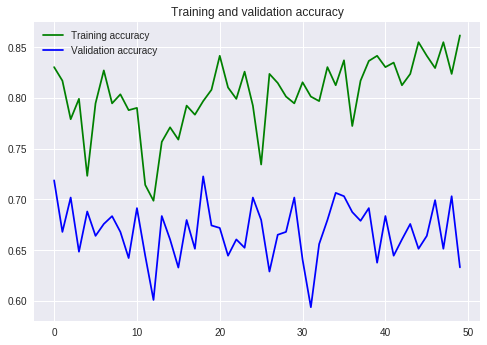

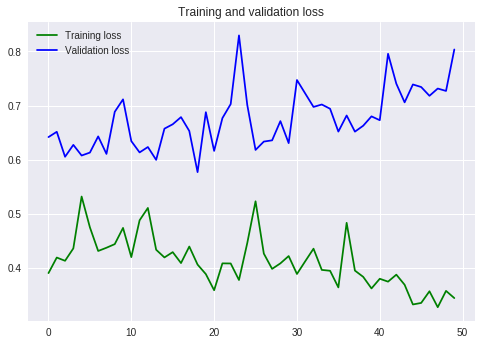

In [127]:
accuracy = guitar_model_fitted.history['acc']
val_accuracy = guitar_model_fitted.history['val_acc']
loss = guitar_model_fitted.history['loss']
val_loss = guitar_model_fitted.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', color='green', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', color='green', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### confusion matrix and associated metrics (precision, recall, F-score) for this classifier.

In [63]:
Y_pred = guitar_model.predict_generator(validation_generator, steps=10)
#The position of the highest number in the column is got. In case we can get the maximum value in the row will need to specify 'axis=0'.
Y_pred
#y_pred = np.argmax(Y_pred, axis=0)
#y_pred
len(Y_pred)

602

In [60]:
len(validation_generator.classes)

602

Confusion Matrix
[[369   0]
 [233   0]]
Classification Report
              precision    recall  f1-score   support

      Guitar       0.61      1.00      0.76       369
  Not Guitar       0.00      0.00      0.00       233

   micro avg       0.61      0.61      0.61       602
   macro avg       0.31      0.50      0.38       602
weighted avg       0.38      0.61      0.47       602

0.6129568106312292 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


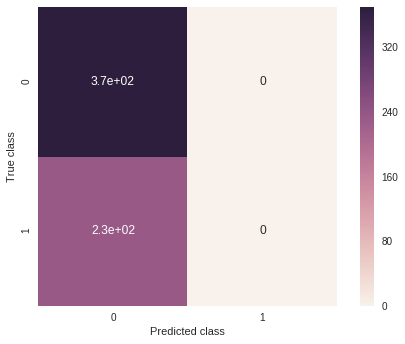

In [64]:
Y_pred = guitar_model.predict_generator(validation_generator, steps=10)
#The position of the highest number in the column is got. In case we can get the maximum value in the row will need to specify 'axis=0'.
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Guitar', 'Not Guitar']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

C = confusion_matrix(validation_generator.classes, y_pred)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

#ROC curve and AUC curve

In [38]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [43]:
len(Y_pred)

332

No handles with labels found to put in legend.


The area under the curve is 0.479779


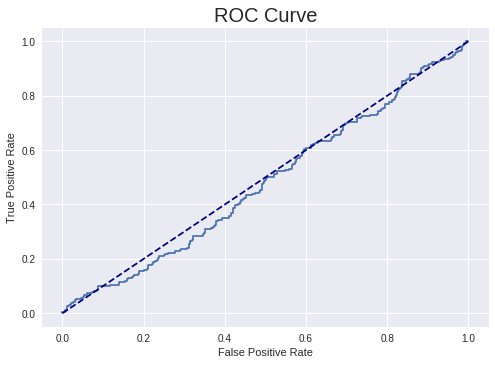

In [66]:
from sklearn.metrics import roc_curve
Y_pred = guitar_model.predict_generator(validation_generator, steps=10).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(validation_generator.classes, Y_pred)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras,tpr_keras)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=20)
plt.legend(loc="lower right")
print('The area under the curve is %f' %(auc_keras))

In [93]:
guitar_model_fitted.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show() 

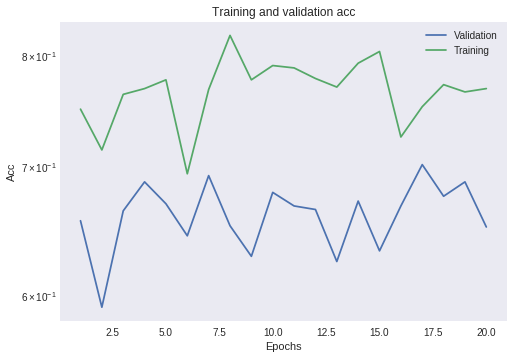

In [114]:
#Eiqui vemos que con 18 epcohs o error faise mínimo. POlo tanto ese vai ser o valor óptimo de epochs.

import numpy as np
import matplotlib.pyplot as plt


plot_metric(guitar_model_fitted, 'acc')

#Vamos a predecir co noso modelo

https://towardsdatascience.com/conv-nets-for-dummies-a-bottom-up-approach-c1b754fb14d6

#Outro link moi moi bo:
https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37